In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import diffractio
import numpy as np
from matplotlib.pyplot import *
%matplotlib widget
import scipy as sp

from diffractio import um, nm, mm

In [3]:
import sys
sys.path.append("../")

import numerical_methods as Sim

# Example

### In this file we exemplify how to run a simple example using a two feature configuration. 

###### Remark: The methodology is general for any type of input encoding but the shape of the arrays must be respected.

# Initiate Solver

In [4]:
## Simulation box conditions
z = .1*mm /10000  ## propagation distance
size = .01*mm  ## Box size
wavelength = 532 * nm  
N = 2*1024  ## number of discretization points of the box
shape = (N, N)

## Circular input filter radius
filter_radius = .06*um

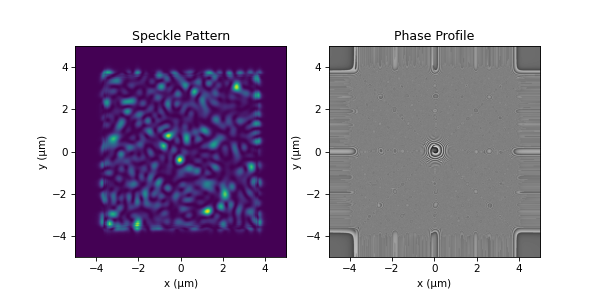

In [5]:
PELM_sim = Sim.solvers.PELM_diffractioSolver(z=z, filter_radius=filter_radius, size=size, wavelength=wavelength, N=N, random_amplitude=True)

PELM_sim.plot()

# Make input features

###### Remark: The shape of the input feature array must follow the requirements of the function that embedds these on the spatial modes basis.

In [6]:
F = 10
f = np.linspace(0,1,F)

feature_points = np.zeros((2, 2*F, 1))
feature_points[0,:F,0] = f
feature_points[1,F:,0] = f

# Config
encoding_shape = (10,10)

# Embedding masks

##### For the input masks to work with the simulator it must have the shape (N_examples, width, height).

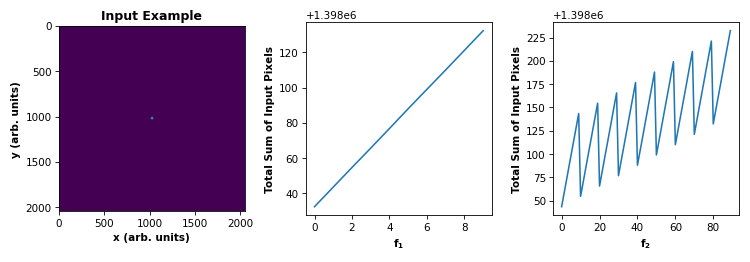

In [7]:
## Generate Input Profiles
input_masks = Sim.ContinuosFeatures(f, f, encoding_shape, shape, ref=1/3)  ## More types of encodings on the masks.py file

fig, axs = subplots(1, 3, figsize=(10,3.5))
axs[0].imshow(input_masks[10]*PELM_sim.filter)
axs[0].set_title("Input Example", weight="bold")

axs[0].set_xlabel("x (arb. units)", weight="bold")
axs[0].set_ylabel("y (arb. units)", weight="bold")

axs[1].plot(np.sum(input_masks[:F], axis=(1,2)))
axs[1].set_xlabel(r"$\mathbf{f_1}$")
axs[1].set_ylabel("Total Sum of Input Pixels", weight="bold")

axs[2].plot(np.sum(input_masks[F:], axis=(1,2)))
axs[2].set_xlabel(r"$\mathbf{f_2}$")
axs[2].set_ylabel("Total Sum of Input Pixels", weight="bold")

fig.tight_layout()

In [8]:
hidden_space = PELM_sim.solver(input_masks, normed=True, noise=5)

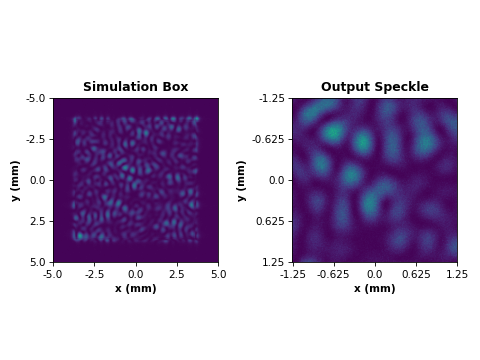

In [9]:
pixels = 2**9

x1, x2 = int(N/2) - int(pixels/2), int(N/2) + int(pixels/2)
y1, y2 = int(N/2) - int(pixels/2), int(N/2) + int(pixels/2)

mid_box_hidden_space = hidden_space[:, x1:x2, y1:y2]  ## select a box in the middle where numerical error is smaller

fig, axs = subplots(1, 2)
##
axs[0].imshow(hidden_space[0])
axs[0].set_title("Simulation Box", weight="bold")

n = 5
axs[0].set_xticks(np.linspace(0,N-1,n), np.linspace(-.5,.5,n)*size)
axs[0].set_yticks(np.linspace(0,N-1,n), np.linspace(-.5,.5,n)*size)
axs[0].set_xlabel("x (mm)", weight="bold")
axs[0].set_ylabel("y (mm)", weight="bold")

axs[1].imshow(mid_box_hidden_space[0])
axs[1].set_title("Output Speckle", weight="bold")

axs[1].set_xticks(np.linspace(0,pixels-1,n), np.linspace(-.5,.5,n)*size*pixels/N)
axs[1].set_yticks(np.linspace(0,pixels-1,n), np.linspace(-.5,.5,n)*size*pixels/N)
axs[1].set_xlabel("x (mm)", weight="bold")
axs[1].set_ylabel("y (mm)", weight="bold")

fig.tight_layout()